In [ ]:
import pandas as pd 
from IPython.display import Image

In [74]:
# Liquid container object.
class liquid_container:
  def __init__(self, name, current_volume, max_volume):
    self.name = name
    self.current_volume = current_volume
    self.max_volume = max_volume
    self.label = str(self.name) + ' (' + str(self.max_volume) + ' ml)'

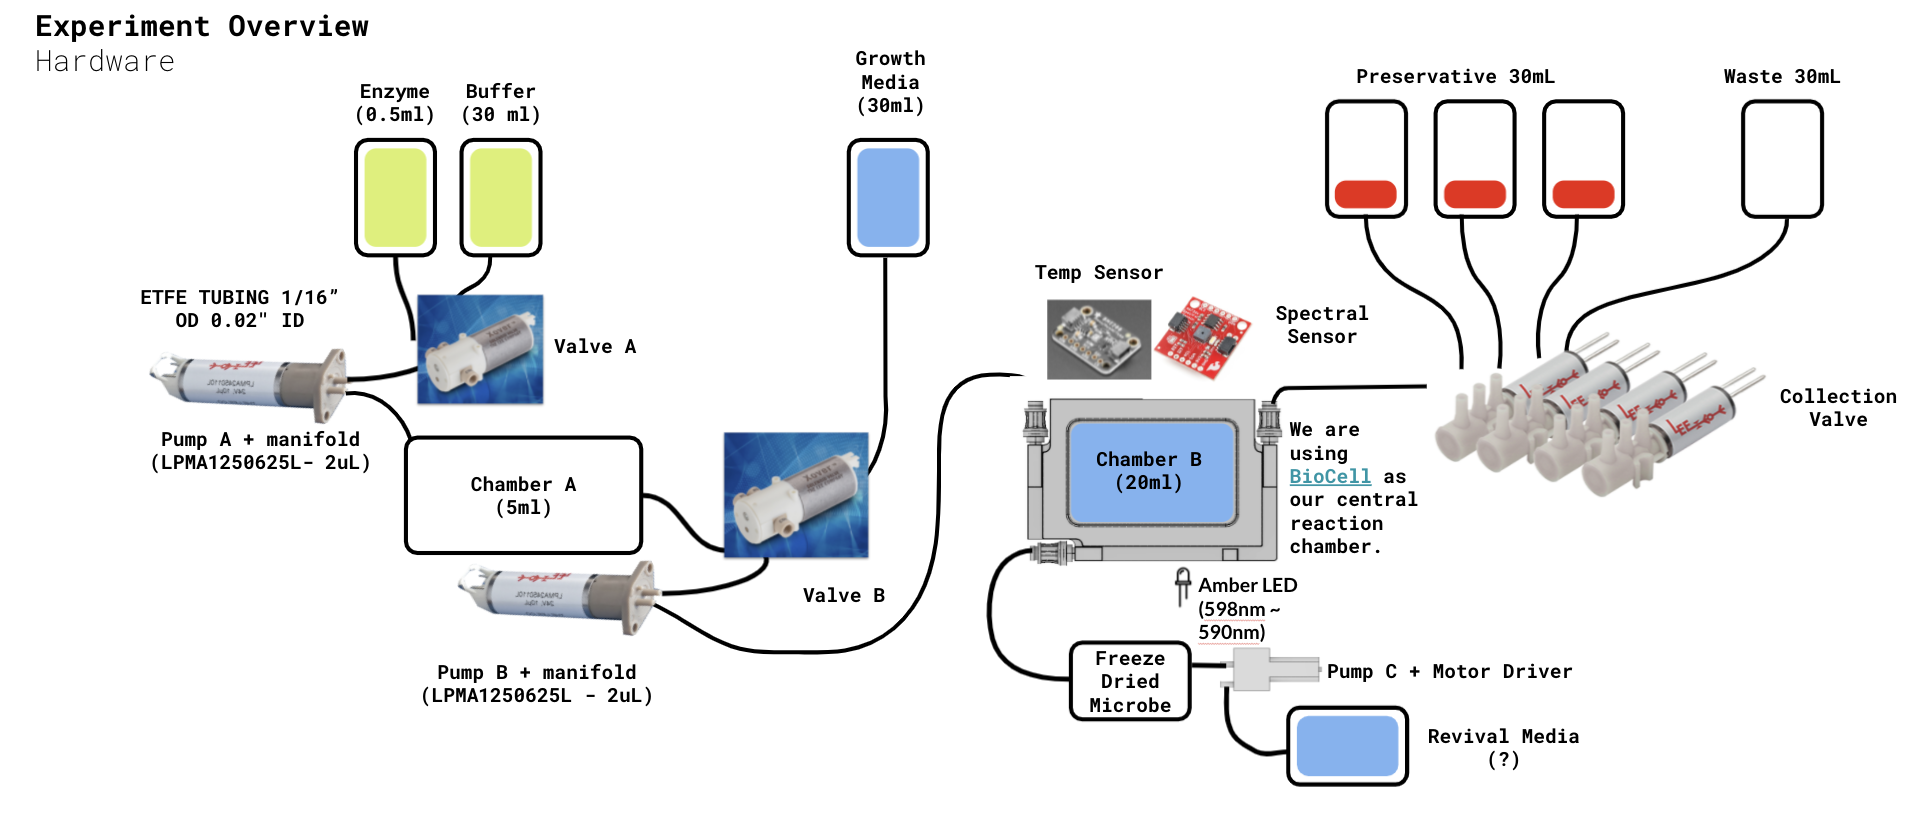

In [76]:
# Initiated liquid variable
enzyme = liquid_container("Enzyme Bag",0.8, 2)
buffer = liquid_container("Buffer Bag",13, 20)
chamA = liquid_container("chamber A",0, 5)
chamB = liquid_container("chamber B",20, 20)
medium = liquid_container("Growth Medium",26, 30)
waste = liquid_container("Waste",0, 25)
microbe = liquid_container("Microbe",20, 20)
pre1 = liquid_container("Pre1",14, 30)
pre2 = liquid_container("Pre2",14, 30)
pre3 = liquid_container("Pre3",14, 30)
pre4 = liquid_container("Pre4",14, 30)
revival = liquid_container("Revival Media",30, 30)

# Initiated other variable
day = 0

# Reset pumps state - off/on
pumpA = 'OFF'
pumpB = 'OFF'
pumpC = 'OFF'

# Reset valve state - 0 = left / 1 = right
valveA = '0'
valveB = '0'
valveC = '0'

# Add data to DF. 
data = [{'day' : day,
         enzyme.label : enzyme.current_volume, 
         buffer.label : buffer.current_volume, 
         chamA.label : chamA.current_volume, 
         chamB.label : chamB.current_volume, 
         medium.label : medium.current_volume, 
         waste.label : waste.current_volume,
         microbe.label : microbe.current_volume, 
         pre1.label : pre1.current_volume, 
         pre2.label : pre2.current_volume, 
         pre3.label : pre3.current_volume, 
         pre4.label : pre4.current_volume,
         revival.label : revival.current_volume,
         'Pump A' : pumpA,
         'Valve A' : valveA,
         'Pump B' : pumpB,
         'Valve B' : valveB,
         'Pump C' : pumpC,
         'Valve C' : valveC,
         }] 
  
# Creates DataFrame. 
df = pd.DataFrame(data) 

In [105]:
#Target/Source can be enzyme, buffer, chamA, chamB, medium, waste, pre1, pre2, pre3, pre4
def move_liquid(day, source, target, volume):
  if (source != "outside"):
    source.current_volume = source.current_volume - volume
  target.current_volume = target.current_volume + volume
  #print(source.name)

  global df
  global pumpA
  global pumpB
  global pumpC
  global valveA
  global valveB
  global valveC

  # Reset pumps state - off/on
  pumpA = 'OFF'
  pumpB = 'OFF'
  pumpC = 'OFF'

  # Reset valve state - 0 = left / 1 = right
  valveA = '0'
  valveB = '0'
  valveC = '0'

  if (source != "outside"):
    if (source.name == "Enzyme Bag"):
      pumpA = 'ON'
      valveA = '0'
      #print(pumpA)

    elif (source.name == "Buffer Bag"):
      pumpA = 'ON'
      valveA = '1'
    
    elif (source.name == "chamber A"):
      pumpB = 'ON'
      valveB = '0'

    elif (source.name == "Growth Medium"):
      pumpB = 'ON'
      valveB = '1'

    elif (source.name == "Revival Media"):
      pumpC = 'ON'

    elif (source.name == "chamber B"):
      pumpC = 'ON'
      if (target.name == "Pre1"):
        valveC = '0'
      elif (target.name == "Pre2"):
        valveC = '1'
      elif (target.name == "Pre3"):
        valveC = '2'
      elif (target.name == "Pre4"):
        valveC = '3'
      elif (target.name == "Waste"):
        valveC = '4'
  #record_change(day)

In [106]:
def record_change(input_day):
  global df
  global pumpA
  global pumpB
  global pumpC
  global valveA
  global valveB
  global valveC
  append_data = [{'day' : input_day,
         enzyme.label : enzyme.current_volume, 
         buffer.label : buffer.current_volume, 
         chamA.label : chamA.current_volume, 
         chamB.label : chamB.current_volume, 
         medium.label : medium.current_volume, 
         waste.label : waste.current_volume,
         microbe.label : microbe.current_volume,  
         pre1.label : pre1.current_volume, 
         pre2.label : pre2.current_volume, 
         pre3.label : pre3.current_volume, 
         pre4.label : pre4.current_volume,
         revival.label : revival.current_volume,
         'Pump A' : pumpA,
         'Valve A' : valveA,
         'Pump B' : pumpB,
         'Valve B' : valveB,
         'Pump C' : pumpC,
         'Valve C' : valveC,
         }] 
  new_df = pd.DataFrame(append_data) 
  df = pd.concat([df, new_df])

In [107]:
# Print the original data 
df 

,day,Enzyme Bag (2 ml),Buffer Bag (20 ml),chamber A (5 ml),chamber B (20 ml),Growth Medium (30 ml),Waste (25 ml),Microbe (20 ml),Pre1 (30 ml),Pre2 (30 ml),Pre3 (30 ml),Pre4 (30 ml),Revival Media (30 ml),Pump A,Valve A,Pump B,Valve B,Pump C,Valve C
0,0,0.80,13.00,0.0,20,26,0,20,14,14,14,14,30,0,0,0,0,0,0
0,0,0.80,13.00,0.0,20,26,0,20,14,14,14,14,30,0,0,0,0,0,0
0,1,0.74,10.06,3.0,20,26,0,20,14,14,14,14,30,1,1,0,0,0,0
0,2,0.74,10.06,3.0,20,26,20,20,14,14,14,14,10,0,0,0,0,1,4
0,3,0.70,8.10,3.0,22,26,20,20,14,14,14,14,10,1,0,0,0,0,0
0,4,0.70,8.10,3.0,18,26,20,20,18,14,14,14,10,0,0,0,0,1,0
0,5,0.66,6.14,3.0,22,24,20,20,18,14,14,14,10,1,0,0,0,0,0
0,6,0.66,6.14,3.0,18,24,20,20,22,14,14,14,10,0,0,0,0,1,0
0,7,0.62,4.18,3.0,22,22,20,20,22,14,14,14,10,1,0,0,0,0,0
0,8,0.62,4.18,3.0,18,22,20,20,26,14,14,14,10,0,0,0,0,1,0


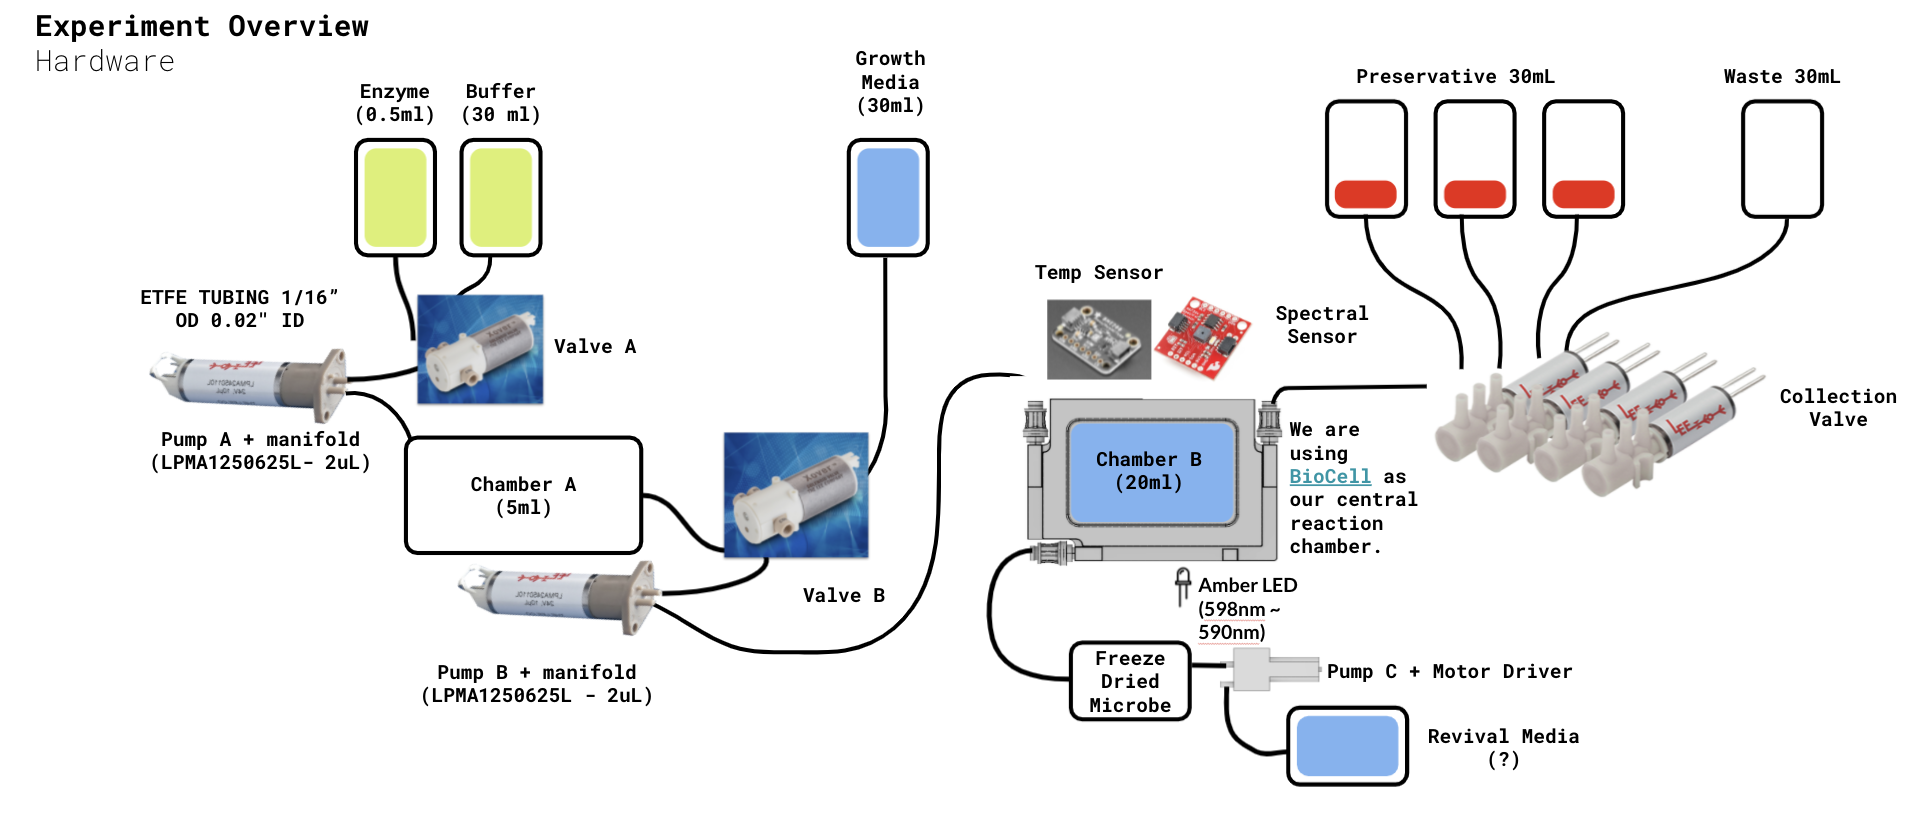

# Operation

In [108]:
#Updates Dec 8 : 11:36AM
for day in range (0, 30):

  #Pre-experiment (Tuesday)
  #M9 in Chamber B  - 20 ml
  #Put bacteria in the microfluidic chip

  if (day ==1):
    move_liquid(day, enzyme, chamA, 0.06)
    move_liquid(day, buffer, chamA, 2.94)

  elif (day ==2):
    move_liquid(day, revival, chamB, 20)
    move_liquid(day, chamB, waste, 20)
    #Openvalve to Waste pump(day, chamB, waste, 20)

    
  elif (day ==3):
    move_liquid(day, chamA, chamB, 2)
    move_liquid(day, buffer, chamA, 1.96)
    move_liquid(day, enzyme, chamA, 0.04)
  
  elif (day ==4):
    move_liquid(day, chamB, pre1, 4)

  elif (day ==5):
    move_liquid(day, chamA, chamB, 2)
    move_liquid(day, medium, chamB, 2)
    move_liquid(day, buffer, chamA, 1.96)
    move_liquid(day, enzyme, chamA, 0.04)
  
  elif (day ==6):
    move_liquid(day, chamB, pre1, 4)

  elif (day ==7):
    move_liquid(day, chamA, chamB, 2)
    move_liquid(day, medium, chamB, 2)
    move_liquid(day, buffer, chamA, 1.96)
    move_liquid(day, enzyme, chamA, 0.04)

  elif (day ==8):
    move_liquid(day, chamB, pre1, 4)

  elif (day ==9):
    move_liquid(day, chamA, chamB, 2)
    move_liquid(day, medium, chamB, 2)
    move_liquid(day, buffer, chamA, 1.96)
    move_liquid(day, enzyme, chamA, 0.04)

  elif (day ==10):
    move_liquid(day, chamB, pre1, 4)

  record_change(day)


In [109]:
df.reset_index(drop=True)

,day,Enzyme Bag (2 ml),Buffer Bag (20 ml),chamber A (5 ml),chamber B (20 ml),Growth Medium (30 ml),Waste (25 ml),Microbe (20 ml),Pre1 (30 ml),Pre2 (30 ml),Pre3 (30 ml),Pre4 (30 ml),Revival Media (30 ml),Pump A,Valve A,Pump B,Valve B,Pump C,Valve C
0,0,0.80,13.00,0.0,20,26,0,20,14,14,14,14,30,0,0,0,0,0,0
1,0,0.80,13.00,0.0,20,26,0,20,14,14,14,14,30,0,0,0,0,0,0
2,1,0.74,10.06,3.0,20,26,0,20,14,14,14,14,30,1,1,0,0,0,0
3,2,0.74,10.06,3.0,20,26,20,20,14,14,14,14,10,0,0,0,0,1,4
4,3,0.70,8.10,3.0,22,26,20,20,14,14,14,14,10,1,0,0,0,0,0
5,4,0.70,8.10,3.0,18,26,20,20,18,14,14,14,10,0,0,0,0,1,0
6,5,0.66,6.14,3.0,22,24,20,20,18,14,14,14,10,1,0,0,0,0,0
7,6,0.66,6.14,3.0,18,24,20,20,22,14,14,14,10,0,0,0,0,1,0
8,7,0.62,4.18,3.0,22,22,20,20,22,14,14,14,10,1,0,0,0,0,0
9,8,0.62,4.18,3.0,18,22,20,20,26,14,14,14,10,0,0,0,0,1,0


In [82]:
df['Pump A'] = df['Pump A'].replace(['ON'],'1')
df['Pump A'] = df['Pump A'].replace(['OFF'],'0')
df['Pump B'] = df['Pump B'].replace(['ON'],'1')
df['Pump B'] = df['Pump B'].replace(['OFF'],'0')
df['Pump C'] = df['Pump C'].replace(['ON'],'1')
df['Pump C'] = df['Pump C'].replace(['OFF'],'0')

In [99]:
df = df.head(14)

In [100]:
df.to_csv(index=False)

'day,Enzyme Bag (2 ml),Buffer Bag (20 ml),chamber A (5 ml),chamber B (20 ml),Growth Medium (30 ml),Waste (25 ml),Microbe (20 ml),Pre1 (30 ml),Pre2 (30 ml),Pre3 (30 ml),Pre4 (30 ml),Revival Media (30 ml),Pump A,Valve A,Pump B,Valve B,Pump C,Valve C\n0,0.8,13.0,0.0,20,26,0,20,14,14,14,14,30,0,0,0,0,0,0\n0,0.8,13.0,0.0,20,26,0,20,14,14,14,14,30,0,0,0,0,0,0\n1,0.74,10.06,3.0,20,26,0,20,14,14,14,14,30,1,1,0,0,0,0\n2,0.74,10.06,3.0,20,26,20,20,14,14,14,14,10,0,0,0,0,1,4\n3,0.7,8.100000000000001,3.0,22,26,20,20,14,14,14,14,10,1,0,0,0,0,0\n4,0.7,8.100000000000001,3.0,18,26,20,20,18,14,14,14,10,0,0,0,0,1,0\n5,0.6599999999999999,6.1400000000000015,3.0,22,24,20,20,18,14,14,14,10,1,0,0,0,0,0\n6,0.6599999999999999,6.1400000000000015,3.0,18,24,20,20,22,14,14,14,10,0,0,0,0,1,0\n7,0.6199999999999999,4.1800000000000015,3.0,22,22,20,20,22,14,14,14,10,1,0,0,0,0,0\n8,0.6199999999999999,4.1800000000000015,3.0,18,22,20,20,26,14,14,14,10,0,0,0,0,1,0\n9,0.5799999999999998,2.2200000000000015,3.0,22,20,20,20,26

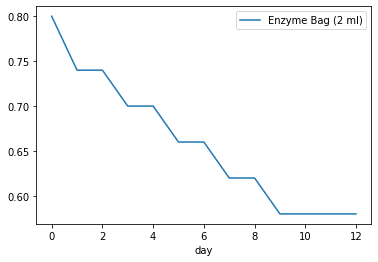

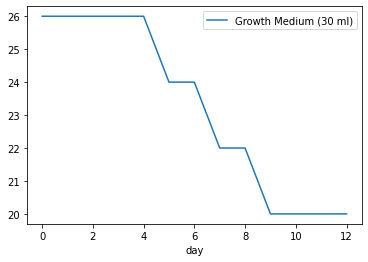

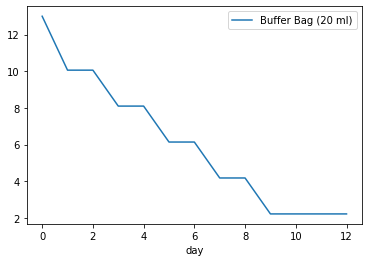

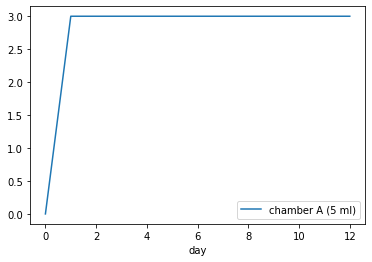

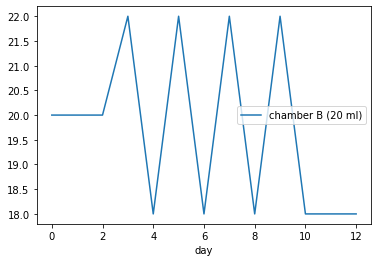

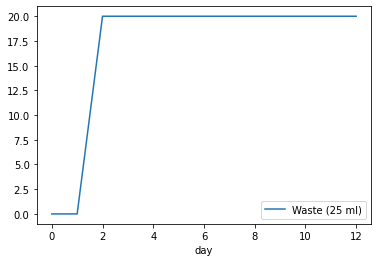

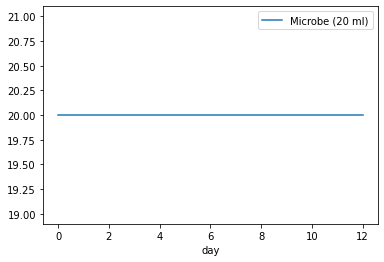

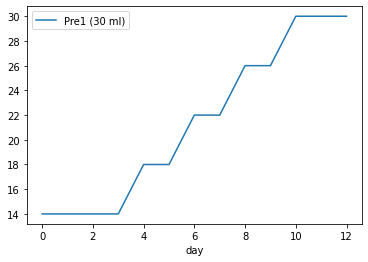

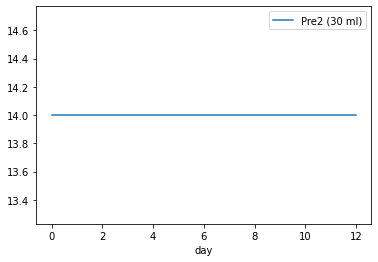

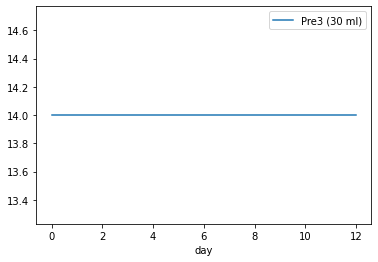

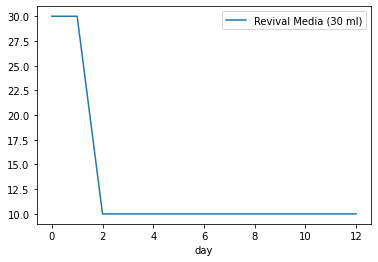

In [101]:
df.plot(x ='day', y=[enzyme.label], kind = 'line')
df.plot(x ='day', y=[medium.label], kind = 'line')
df.plot(x ='day', y=[buffer.label], kind = 'line')
df.plot(x ='day', y=[chamA.label], kind = 'line')
df.plot(x ='day', y=[chamB.label], kind = 'line')
df.plot(x ='day', y=[waste.label], kind = 'line')
df.plot(x ='day', y=[microbe.label], kind = 'line')
df.plot(x ='day', y=[pre1.label], kind = 'line')
df.plot(x ='day', y=[pre2.label], kind = 'line')
df.plot(x ='day', y=[pre3.label], kind = 'line')
df.plot(x ='day', y=[revival.label], kind = 'line')

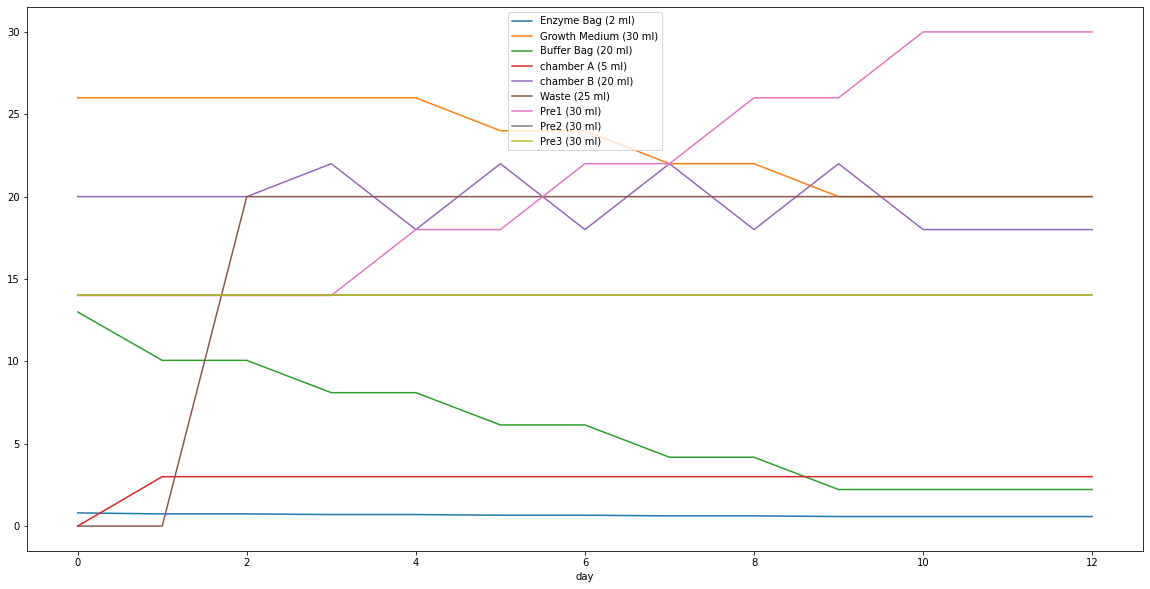

In [104]:
df.plot(x ='day', y=[enzyme.label, medium.label, buffer.label, chamA.label, chamB.label, waste.label, pre1.label, pre2.label, pre3.label], kind = 'line', figsize=(20, 10))

In [ ]:
 waste.label, pre1.label, pre2.label, pre3.label

('Waste (30 ml)', 'Pre1 (24 ml)', 'Pre2 (24 ml)', 'Pre3 (24 ml)')

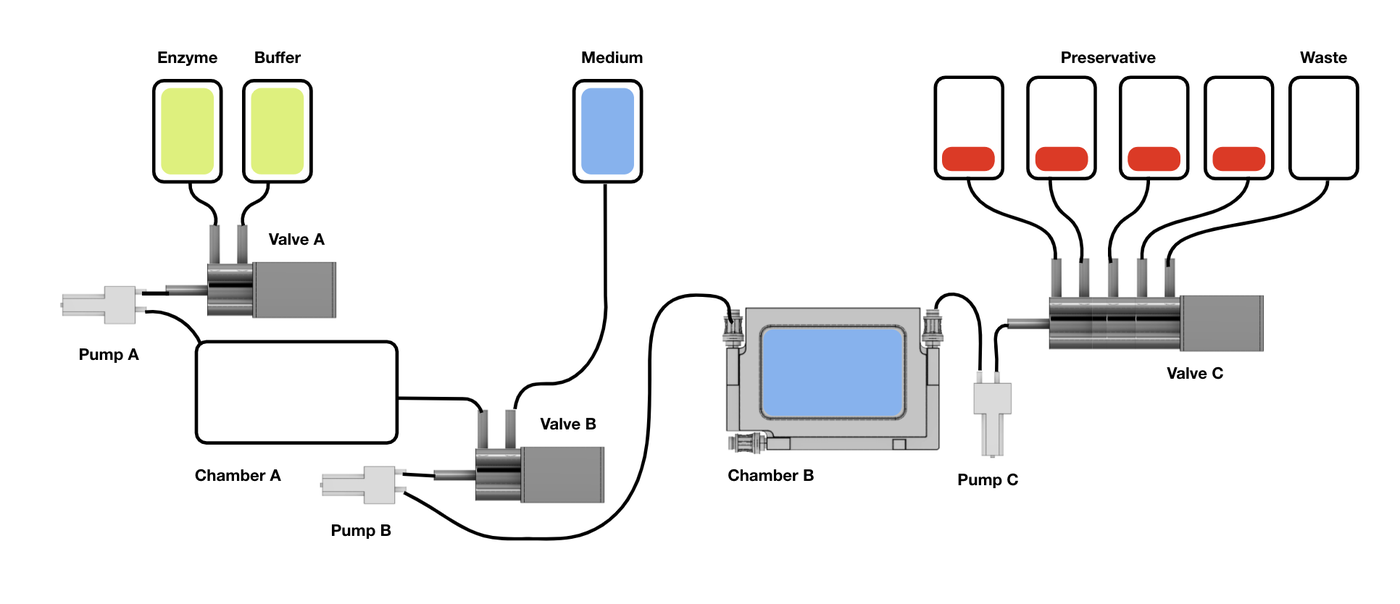

In [ ]:
# Show system diagram
Image('https://dam-prod.media.mit.edu/thumb/2021/03/07/micro_pet_diagram.png.1400x1400.png')